In [709]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import wavfile
from pathlib import Path
import numpy as np
from scipy import fftpack
from sklearn.preprocessing import normalize
from scipy import signal


In [710]:
# Load wavefile
def readwav(file:str):
    filepath = Path(file).absolute()
    samplerate, data = wavfile.read((filepath))
    print(f"number of channels = {data.shape}")
    length = data.shape[0] / samplerate
    print(f"length = {length}s")
    return length,data,samplerate

In [711]:
# file="normal__103_1305031931979_B.wav"
file="normal__140_1306519735121_A.wav"
timings = pd.read_csv("./heartbeats/set_a_timing.csv")
length,heart,samplerate = readwav(f"./heartbeats/wav files/{file}")
maxheart = np.amax(heart)
norm_heart = heart/maxheart

number of channels = (45000,)
length = 11.25s


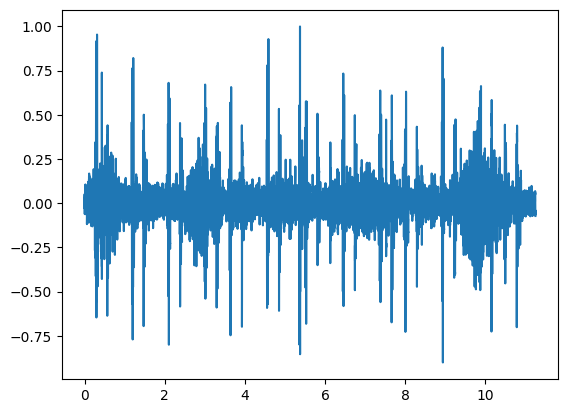

In [712]:
t0 = 1/samplerate

t = np.arange(0,length,1/samplerate)
# t_step = t[1]-t[0]
plt.plot(t,norm_heart)
plt.show()

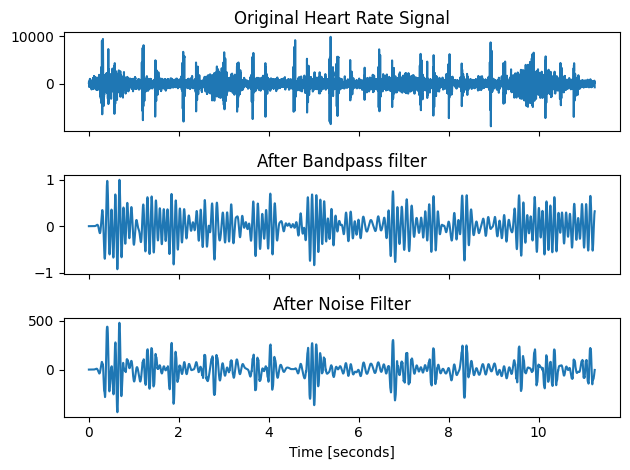

In [713]:
t0 = 1/samplerate
t = np.arange(0,length,1/samplerate)
sig = heart
fig, (ax1, ax2,ax3) = plt.subplots(3, 1, sharex=True)
ax1.plot(t, sig)
ax1.set_title('Original Heart Rate Signal')
sos = signal.butter(20, [.2,3], 'bp', fs=1000, output='sos')
filtered_heart = signal.sosfilt(sos, sig)
norm_heart = filtered_heart/np.amax(filtered_heart)
ax2.plot(t, norm_heart)
ax2.set_title('After Bandpass filter')
## Removing noise
norm_heart = signal.signaltools.wiener(filtered_heart,300)
ax3.plot(t, norm_heart)
ax3.set_title('After Noise Filter')
ax3.set_xlabel('Time [seconds]')
plt.tight_layout()
plt.show()

In [714]:
fft = fftpack.fft(norm_heart)
freqs = fftpack.fftfreq(norm_heart.size,d=t0)
getPower = lambda fft: np.abs(fft)**2
power = getPower(fft)


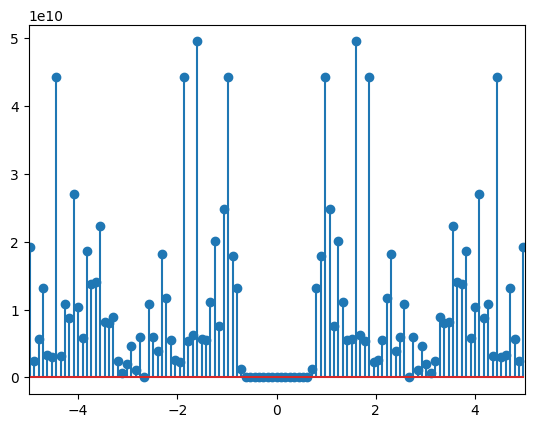

In [715]:
freqmask = np.abs(freqs) < 5
freqs = freqs[freqmask]
power = power[freqmask]
plt.stem(freqs,power)
plt.xlim(-5,5)
plt.show()

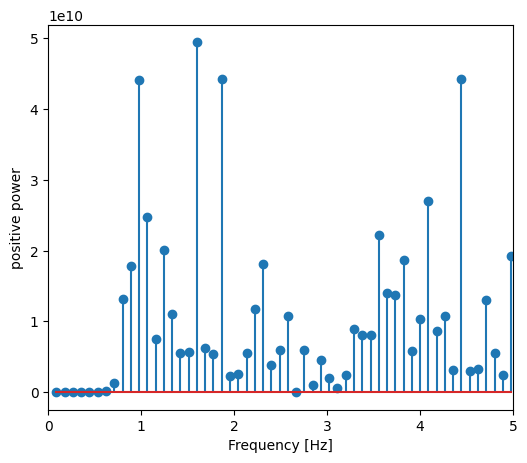

In [716]:
pos_mask = np.where((freqs > 0))
freqs = freqs[pos_mask]
pos_power = power[pos_mask]
maxfreq = freqs[pos_power.argmax()]
plt.figure(figsize=(6, 5))
plt.stem(freqs, pos_power)
plt.xlabel('Frequency [Hz]')
plt.ylabel('positive power')
plt.xlim(0,5)
plt.show()

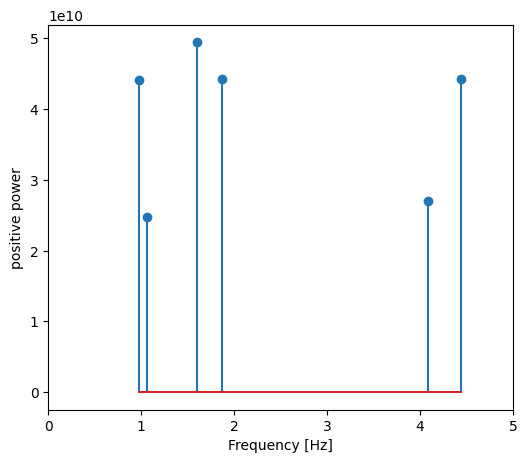

140.44444444444446


In [721]:
outlierMask =  ~(pos_power > (np.mean(pos_power) + 5*np.std(pos_power))) # removes possible outliers
meanMask = (pos_power >= (np.mean(pos_power) + np.std(pos_power) )) # Return all freq of large amplitudes
mask = meanMask & outlierMask
plt.figure(figsize=(6, 5))
plt.stem(freqs[mask], pos_power[mask])
plt.xlabel('Frequency [Hz]')
plt.ylabel('positive power')
plt.xlim(0,5)
plt.show()
strongest = freqs[mask]
bpm = np.mean(strongest)*60
print(bpm)

In [718]:
freqs[mask].size

20

In [719]:
print(outlierMask)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True]


In [720]:
np.mean(pos_power)

10450162601.313992